In [16]:
import cv2

In [17]:
cam = cv2.VideoCapture(0)

In [18]:
cv2.namedWindow("test0")

In [19]:
img_counter = 0
img_name = 0
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test0", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:  #ESC 
        print("Escape hit, closing...")
        break
    elif k%256 == 32:  #SPACE 
        img_name = "frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

frame_0.png written!
Escape hit, closing...


In [20]:
img = cv2.imread(img_name)

In [21]:
import matplotlib.pyplot as plt

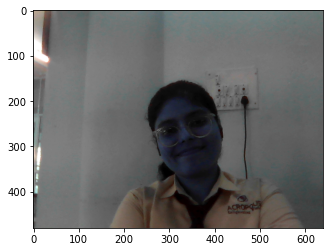

In [22]:
plt.imshow(img)

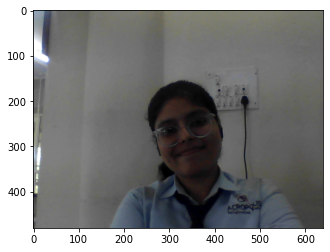

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [24]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#To draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

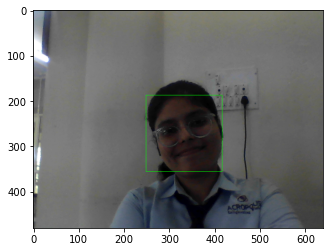

In [26]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
from deepface import DeepFace

In [28]:
predictions = DeepFace.analyze(img, enforce_detection=False)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:24<00:00,  6.04s/it]


In [29]:
predictions

{'emotion': {'angry': 0.003627011028584093,
  'disgust': 3.6599752206711855e-05,
  'fear': 0.04630946787074208,
  'happy': 99.86336827278137,
  'sad': 0.07212832570075989,
  'surprise': 0.0011081302545790095,
  'neutral': 0.01342153555015102},
 'dominant_emotion': 'happy',
 'region': {'x': 250, 'y': 188, 'w': 165, 'h': 165},
 'age': 38,
 'gender': 'Woman',
 'race': {'asian': 11.913234740495682,
  'indian': 14.447581768035889,
  'black': 5.261027067899704,
  'white': 21.60840481519699,
  'middle eastern': 22.22595512866974,
  'latino hispanic': 24.543799459934235},
 'dominant_race': 'latino hispanic'}

In [30]:
dominantEmotion = predictions['dominant_emotion']

In [31]:
print("You seem to be mostly", dominantEmotion)

You seem to be mostly happy
